### Heart_rate_detection_from_bed-embedded_Ballistocardiogram_sensors

***Importing Important libiraries***


In [156]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime


**First, we need to generate a new dataframe for the BCG file sample with the generated timestamps**

In [157]:
def build_bcg_df(bcg_values, initial_timestamp, fs):
    """
    Helper function to build a DataFrame with generated timestamps.
    """
    n = len(bcg_values)
    # Generate timestamps spaced by 1/fs seconds, converted to milliseconds
    timestamps = [initial_timestamp + pd.Timedelta(milliseconds=round(i * 1000 / fs)) for i in range(n)]
    df = pd.DataFrame({
        'BCG': bcg_values,
        'Timestamp': [int(ts.timestamp() * 1000) for ts in timestamps],
        'fs': fs
    })
    return df

In [158]:
def add_timestamps_to_bcg(input_csv, output_csv):
    """
    Reads a CSV, generates timestamps using the initial timestamp and fs,
    and writes the result to output_csv.
    """
    df_bcg_raw = pd.read_csv(input_csv)
    bcg_values = df_bcg_raw['BCG'].values

    initial_timestamp = pd.to_datetime(df_bcg_raw.loc[0, 'Timestamp'], unit='ms')
    fs = float(df_bcg_raw.loc[0, 'fs'])

    # Build BCG DataFrame with generated timestamps
    df_bcg = build_bcg_df(bcg_values, initial_timestamp, fs)

    df_bcg.to_csv(output_csv, index=False)
    print(f"Processed data saved to {output_csv}")

In [159]:
# initial_timestamp = pd.to_datetime(df_bcg_raw.loc[0, 'Timestamp'], unit='ms')
#     fs = float(df_bcg_raw.loc[0, 'fs'])

#     # Build BCG DataFrame
#     df_bcg = build_bcg_df(bcg_values, initial_timestamp, fs)

In [160]:
# Example usage:
input_csv = r"F:\projectdata\dataset\data\03\BCG\03_20231105_BCG.csv"
output_csv = "bcg_data_with_timestamps.csv"
add_timestamps_to_bcg(input_csv, output_csv)

Processed data saved to bcg_data_with_timestamps.csv


In [161]:
# Read the files
bcg_df = pd.read_csv(r"F:\projectdata\Heart_rate_detection_from_bed-embedded_Ballistocardiogram_sensors\code\bcg_data_with_timestamps.csv")
hr_df = pd.read_csv(r"f:\projectdata\dataset\data\03\Reference\RR\03_20231105_RR.csv")


In [162]:
hr_df.head


<bound method NDFrame.head of                Timestamp  Heart Rate  RR Interval in seconds
0      2023/11/5 0:03:48          84                   0.813
1      2023/11/5 0:03:49          83                   0.876
2      2023/11/5 0:03:50          81                   0.745
3      2023/11/5 0:03:50          81                   0.706
4      2023/11/5 0:03:51          81                   0.722
...                  ...         ...                     ...
35595  2023/11/5 9:29:28         101                   4.077
35596  2023/11/5 9:29:28         101                   0.416
35597  2023/11/5 9:29:29         102                   1.864
35598  2023/11/5 9:29:33         102                   0.781
35599  2023/11/5 9:29:33         102                   4.423

[35600 rows x 3 columns]>

**Converting the BCG timestamp to human-readable format to be easy to compare it with RR**

In [163]:
# Convert BCG timestamp to human-readable format
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['Timestamp'], unit='ms')
bcg_df['human_readable_timestamp'] = bcg_df['human_readable_timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S.%f').str[:-3]

# Display the first few rows to verify the conversion
print("\nFirst few rows of BCG data with human-readable timestamps:")
print(bcg_df[['BCG', 'human_readable_timestamp', 'fs']].head())

# Save the updated dataframe if needed
#bcg_df.to_csv("bcg_data_with_human_readable_timestamps.csv", index=False)


First few rows of BCG data with human-readable timestamps:
   BCG human_readable_timestamp     fs
0  -40  2023/11/04 15:47:49.870  140.0
1  -41  2023/11/04 15:47:49.877  140.0
2  -36  2023/11/04 15:47:49.884  140.0
3  -44  2023/11/04 15:47:49.891  140.0
4  -41  2023/11/04 15:47:49.899  140.0


In [164]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1699112869870,140.0,2023/11/04 15:47:49.870
1,-41,1699112869877,140.0,2023/11/04 15:47:49.877
2,-36,1699112869884,140.0,2023/11/04 15:47:49.884
3,-44,1699112869891,140.0,2023/11/04 15:47:49.891
4,-41,1699112869899,140.0,2023/11/04 15:47:49.899
...,...,...,...,...
4890301,-201,1699147800591,140.0,2023/11/05 01:30:00.591
4890302,-207,1699147800599,140.0,2023/11/05 01:30:00.599
4890303,-206,1699147800606,140.0,2023/11/05 01:30:00.606
4890304,-204,1699147800613,140.0,2023/11/05 01:30:00.613


In [165]:
bcg_df.head(-5)

,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1699112869870,140.0,2023/11/04 15:47:49.870
1,-41,1699112869877,140.0,2023/11/04 15:47:49.877
2,-36,1699112869884,140.0,2023/11/04 15:47:49.884
3,-44,1699112869891,140.0,2023/11/04 15:47:49.891
4,-41,1699112869899,140.0,2023/11/04 15:47:49.899
...,...,...,...,...
4890301,-201,1699147800591,140.0,2023/11/05 01:30:00.591
4890302,-207,1699147800599,140.0,2023/11/05 01:30:00.599
4890303,-206,1699147800606,140.0,2023/11/05 01:30:00.606
4890304,-204,1699147800613,140.0,2023/11/05 01:30:00.613


In [166]:
hr_df.head(-5)

,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


In [167]:
bcg_df.head(-5)


,BCG,Timestamp,fs,human_readable_timestamp
0,-40,1699112869870,140.0,2023/11/04 15:47:49.870
1,-41,1699112869877,140.0,2023/11/04 15:47:49.877
2,-36,1699112869884,140.0,2023/11/04 15:47:49.884
3,-44,1699112869891,140.0,2023/11/04 15:47:49.891
4,-41,1699112869899,140.0,2023/11/04 15:47:49.899
...,...,...,...,...
4890301,-201,1699147800591,140.0,2023/11/05 01:30:00.591
4890302,-207,1699147800599,140.0,2023/11/05 01:30:00.599
4890303,-206,1699147800606,140.0,2023/11/05 01:30:00.606
4890304,-204,1699147800613,140.0,2023/11/05 01:30:00.613


In [168]:
hr_df.head(-5)


,Timestamp,Heart Rate,RR Interval in seconds
0,2023/11/5 0:03:48,84,0.813
1,2023/11/5 0:03:49,83,0.876
2,2023/11/5 0:03:50,81,0.745
3,2023/11/5 0:03:50,81,0.706
4,2023/11/5 0:03:51,81,0.722
...,...,...,...
35590,2023/11/5 9:29:18,95,0.574
35591,2023/11/5 9:29:19,98,0.579
35592,2023/11/5 9:29:19,98,0.575
35593,2023/11/5 9:29:21,99,0.937


**Comparing between BCG and RR times to be ready to sync them**

In [169]:
# Convert timestamps to datetime for comparison
bcg_start = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[0])
bcg_end = pd.to_datetime(bcg_df['human_readable_timestamp'].iloc[-1])
hr_start = pd.to_datetime(hr_df['Timestamp'].iloc[0])
hr_end = pd.to_datetime(hr_df['Timestamp'].iloc[-1])

print("BCG Data:")
print(f"Start time: {bcg_start}")
print(f"End time: {bcg_end}")
print("\nHeart Rate Data:")
print(f"Start time: {hr_start}")
print(f"End time: {hr_end}")

# Determine which dataset starts later and ends earlier
if bcg_start > hr_start:
    print("\nBCG data starts later than Heart Rate data")
else:
    print("\nHeart Rate data starts later than BCG data")

if bcg_end < hr_end:
    print("BCG data ends earlier than Heart Rate data")
else:
    print("Heart Rate data ends earlier than BCG data")

# Calculate the overlap period
overlap_start = max(bcg_start, hr_start)
overlap_end = min(bcg_end, hr_end)
print(f"\nOverlap period:")
print(f"Start: {overlap_start}")
print(f"End: {overlap_end}")

BCG Data:
Start time: 2023-11-04 15:47:49.870000
End time: 2023-11-05 01:30:00.656000

Heart Rate Data:
Start time: 2023-11-05 00:03:48
End time: 2023-11-05 09:29:33

Heart Rate data starts later than BCG data
BCG data ends earlier than Heart Rate data

Overlap period:
Start: 2023-11-05 00:03:48
End: 2023-11-05 01:30:00.656000


*Then, we will synchronize that datafarmes to the averlap period*

**Now, we will sync the timestamps of BCG and RR**

In [ ]:
# Convert the timestamps to datetime (if not already)
bcg_df['human_readable_timestamp'] = pd.to_datetime(bcg_df['human_readable_timestamp'])
hr_df['Timestamp'] = pd.to_datetime(hr_df['Timestamp'])

bcg_df['time'] = bcg_df['human_readable_timestamp'].dt.time
hr_df['time'] = hr_df['Timestamp'].dt.time

# Extract the time from the overlap period (ignoring the date)
overlap_start_time = overlap_start.time()
overlap_end_time = overlap_end.time()

# Filter both dataframes to only include data within the overlap period based on time
bcg_df_filtered = bcg_df[(bcg_df['human_readable_timestamp'] >= overlap_start) & 
                         (bcg_df['human_readable_timestamp'] <= overlap_end)]

hr_df_filtered = hr_df[(hr_df['Timestamp'] >= overlap_start) & 
                       (hr_df['Timestamp'] <= overlap_end)]
# ...ex

# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head())

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head())



Filtered BCG Data (Time-based filtering):
         BCG      Timestamp     fs human_readable_timestamp             time
4166139  -60  1699142628006  140.0  2023-11-05 00:03:48.006  00:03:48.006000
4166140  -79  1699142628013  140.0  2023-11-05 00:03:48.013  00:03:48.013000
4166141  -77  1699142628020  140.0  2023-11-05 00:03:48.020  00:03:48.020000
4166142  -80  1699142628027  140.0  2023-11-05 00:03:48.027  00:03:48.027000
4166143  -58  1699142628034  140.0  2023-11-05 00:03:48.034  00:03:48.034000

Filtered Heart Rate Data (Time-based filtering):
            Timestamp  Heart Rate  RR Interval in seconds      time
0 2023-11-05 00:03:48          84                   0.813  00:03:48
1 2023-11-05 00:03:49          83                   0.876  00:03:49
2 2023-11-05 00:03:50          81                   0.745  00:03:50
3 2023-11-05 00:03:50          81                   0.706  00:03:50
4 2023-11-05 00:03:51          81                   0.722  00:03:51


In [171]:
# Print the filtered dataframes
print("\nFiltered BCG Data (Time-based filtering):")
print(bcg_df_filtered.head(-5))

print("\nFiltered Heart Rate Data (Time-based filtering):")
print(hr_df_filtered.head(-5))


Filtered BCG Data (Time-based filtering):
         BCG      Timestamp     fs human_readable_timestamp             time
4166139  -60  1699142628006  140.0  2023-11-05 00:03:48.006  00:03:48.006000
4166140  -79  1699142628013  140.0  2023-11-05 00:03:48.013  00:03:48.013000
4166141  -77  1699142628020  140.0  2023-11-05 00:03:48.020  00:03:48.020000
4166142  -80  1699142628027  140.0  2023-11-05 00:03:48.027  00:03:48.027000
4166143  -58  1699142628034  140.0  2023-11-05 00:03:48.034  00:03:48.034000
...      ...            ...    ...                      ...              ...
4890301 -201  1699147800591  140.0  2023-11-05 01:30:00.591  01:30:00.591000
4890302 -207  1699147800599  140.0  2023-11-05 01:30:00.599  01:30:00.599000
4890303 -206  1699147800606  140.0  2023-11-05 01:30:00.606  01:30:00.606000
4890304 -204  1699147800613  140.0  2023-11-05 01:30:00.613  01:30:00.613000
4890305 -208  1699147800620  140.0  2023-11-05 01:30:00.620  01:30:00.620000

[724167 rows x 5 columns]

Filte

In [172]:
# Save the filtered dataframe
hr_df_filtered.to_csv("hr_data_filtered.csv", index=False)

In [173]:
bcg_df_filtered.head()

,BCG,Timestamp,fs,human_readable_timestamp,time
4166139,-60,1699142628006,140.0,2023-11-05 00:03:48.006,00:03:48.006000
4166140,-79,1699142628013,140.0,2023-11-05 00:03:48.013,00:03:48.013000
4166141,-77,1699142628020,140.0,2023-11-05 00:03:48.020,00:03:48.020000
4166142,-80,1699142628027,140.0,2023-11-05 00:03:48.027,00:03:48.027000
4166143,-58,1699142628034,140.0,2023-11-05 00:03:48.034,00:03:48.034000


**We need to change the fs from 140HZ to 50HZ, so we will resample the BCG file to 50HZ**

In [174]:
import numpy as np
import pandas as pd

# Get only numeric columns
numeric_cols = bcg_df_filtered.select_dtypes(include='number').columns

# Original and target sample rates
fs_original = 140
fs_target = 50

# Time vectors
t_original = np.arange(len(bcg_df_filtered)) / fs_original
t_target = np.arange(0, t_original[-1], 1/fs_target)

# Interpolate only numeric columns
bcg_df_resampled = pd.DataFrame({
    col: np.interp(t_target, t_original, bcg_df_filtered[col].values.astype(float))
    for col in numeric_cols
})




In [175]:
# Save the filtered dataframe
bcg_df_resampled.to_csv("bcg_df_resampled.csv", index=False)

In [176]:
print(len(bcg_df_resampled))

258633


In [177]:
print("Original duration (s):", len(bcg_df_filtered) / 140)
print("Expected resampled length:", len(bcg_df_filtered) / 140 * 50)
print("Actual resampled length:", len(bcg_df_resampled))


Original duration (s): 5172.657142857143
Expected resampled length: 258632.85714285716
Actual resampled length: 258633


In [178]:
bcg_df_resampled.head()

,BCG,Timestamp,fs
0,-60.0,1.699143e+12,140.0
1,-79.4,1.699143e+12,140.0
2,-10.0,1.699143e+12,140.0
3,-239.0,1.699143e+12,140.0
4,-24.2,1.699143e+12,140.0


**Importing another required libarries**

In [179]:
# Import required libraries
import math
import os

import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

from band_pass_filtering import band_pass_filtering
from compute_vitals import vitals
from detect_apnea_events import apnea_events
from detect_body_movements import detect_patterns
from modwt_matlab_fft import modwt
from modwt_mra_matlab_fft import modwtmra
from remove_nonLinear_trend import remove_nonLinear_trend
from data_subplot import data_subplot

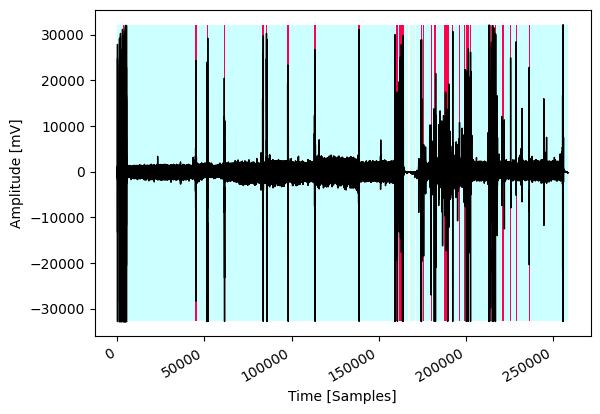

In [180]:
utc_time = bcg_df_resampled['Timestamp']
utc_time = utc_time.to_numpy()
data_stream = bcg_df_resampled['BCG']

start_point, end_point, window_shift, fs = 0, 500, 500, 50
# ==========================================================================================================
data_stream, utc_time, flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)
# ==========================================================================================================
# BCG signal extraction
movement = band_pass_filtering(data_stream, fs, "bcg")
# ==========================================================================================================
# Respiratory signal extraction
breathing = band_pass_filtering(data_stream, fs, "breath")
breathing = remove_nonLinear_trend(breathing, 3)
breathing = savgol_filter(breathing, 11, 3)
# ==========================================================================================================
w = modwt(movement, 'bior3.9', 4)
dc = modwtmra(w, 'bior3.9')
wavelet_cycle = dc[4]
# ==========================================================================================================
# Vital Signs estimation - (10 seconds window is an optimal size for vital signs measurement)
t1, t2, window_length, window_shift = 0, 500, 500, 500
hop_size = math.floor((window_length - 1) / 2)
limit = int(math.floor(breathing.size / window_shift))
# ==========================================================================================================
# Heart Rate
#beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

In [181]:
print("wavelet_cycle length:", len(wavelet_cycle))
print("utc_time length:", len(utc_time))
print("t2:", t2)




wavelet_cycle length: 258633
utc_time length: 258633
t2: 500


In [182]:
# Heart Rate
beats = vitals(t1, t2, window_shift, limit, wavelet_cycle, utc_time, mpd=1, plot=0)

In [183]:
beats

array([ 77.1 ,  68.03,  83.34,  72.53,  77.42,  77.58,  75.69,  84.59,
        73.77,  93.33,  89.04,  84.71,  84.6 ,  85.71,  94.94,  76.6 ,
        79.3 ,  73.5 ,  81.64,  78.6 ,  82.45,  83.51,  78.01,  93.36,
        87.64,  85.71,  98.37,  97.19,  89.45,  86.6 ,  76.11,  79.64,
        77.09,  76.44,  74.16,  73.32,  66.97,  76.21,  87.25,  75.79,
        82.45,  98.13,  78.44,  91.3 ,  90.71,  93.95,  83.92,  97.61,
        86.86,  86.48,  72.85,  77.25,  73.83,  80.18,  86.75,  84.97,
        81.76,  85.71,  85.71,  87.25,  78.95,  84.78,  89.17,  79.3 ,
        83.87,  84.51,  77.75,  81.59,  86.87,  81.26,  91.9 ,  79.12,
        75.31,  84.05,  75.95,  75.34,  78.95,  78.43,  78.76,  82.28,
        83.87,  89.36,  71.74,  83.69,  74.23,  79.3 ,  85.34,  72.05,
        92.51,  73.33,  74.38,  82.98,  96.36,  84.23,  82.63, 101.12,
        78.94,  78.26,  75.95,  81.08,  79.47,  77.42,  77.42,  74.49,
        82.8 ,  75.  ,  92.31,  94.94,  79.12,  91.64,  78.78,  88.04,
      

In [184]:
len(beats)

517

In [185]:
len(hr_df_filtered)

6459

In [186]:
hr_df_filtered.head()


,Timestamp,Heart Rate,RR Interval in seconds,time
0,2023-11-05 00:03:48,84,0.813,00:03:48
1,2023-11-05 00:03:49,83,0.876,00:03:49
2,2023-11-05 00:03:50,81,0.745,00:03:50
3,2023-11-05 00:03:50,81,0.706,00:03:50
4,2023-11-05 00:03:51,81,0.722,00:03:51


**Now, we need to resample the RR file to 10s to take the avg of every 10s and make a new dataframe with these averages**

In [187]:
import pandas as pd

# If datetime is not in columns but is already the index, reset and convert
if 'Timestamp' not in hr_df_filtered.columns:
    hr_df_filtered = hr_df_filtered.reset_index()

# Now ensure it's in datetime format
hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])

# Set datetime as index
hr_df_filtered = hr_df_filtered.set_index('Timestamp')

# Keep only numeric columns (like Heart Rate and RR Interval)
numeric_cols = hr_df_filtered.select_dtypes(include='number')

# Resample every 10 seconds and compute mean
hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


C:\Users\elwady\AppData\Local\Temp\ipykernel_17764\3657441826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_df_filtered['Timestamp'] = pd.to_datetime(hr_df_filtered['Timestamp'])
C:\Users\elwady\AppData\Local\Temp\ipykernel_17764\3657441826.py:17: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  hr_df_avg_10s = numeric_cols.resample('10S').mean().reset_index()


In [188]:
print("hr_df_avg_10s:",len(hr_df_avg_10s))
print("beats:",len(beats))



hr_df_avg_10s: 519
beats: 517


In [189]:
# Save the filtered dataframe
hr_df_avg_10s.to_csv("hr_df_avg_10s.csv", index=False)

In [190]:
# Ensure both arrays have the same length
min_length = min(len(beats), len(hr_df_avg_10s))

# Trim the larger one
beats_trimmed = beats[:min_length]
hr_df_avg_10s_trimmed = hr_df_avg_10s[:min_length]


In [191]:
print("hr_df_avg_10s_trimmed:",len(hr_df_avg_10s_trimmed))
print("beats_trimmed:",len(beats_trimmed))


hr_df_avg_10s_trimmed: 517
beats_trimmed: 517


In [192]:
hr_df_avg_10s_trimmed.head()


,Timestamp,Heart Rate,RR Interval in seconds
0,2023-11-05 00:03:40,83.500000,0.844500
1,2023-11-05 00:03:50,79.923077,0.779692
2,2023-11-05 00:04:00,78.384615,0.758923
3,2023-11-05 00:04:10,79.785714,0.749786
4,2023-11-05 00:04:20,80.846154,0.727385


In [193]:
HR = hr_df_avg_10s_trimmed['Heart Rate'].tolist()


In [194]:
HR

[83.5,
 79.92307692307692,
 78.38461538461539,
 79.78571428571429,
 80.84615384615384,
 82.64285714285714,
 80.38461538461539,
 83.0,
 95.46666666666667,
 89.84615384615384,
 78.84615384615384,
 88.29411764705883,
 95.0,
 85.92857142857143,
 89.6875,
 nan,
 95.875,
 102.94117647058823,
 105.11111111111111,
 99.84615384615384,
 95.1875,
 88.92857142857143,
 86.0,
 86.6,
 83.76923076923077,
 81.07692307692308,
 80.71428571428571,
 80.64285714285714,
 81.58333333333333,
 80.21428571428571,
 80.5,
 76.18181818181819,
 76.53846153846153,
 77.0,
 76.66666666666667,
 77.21428571428571,
 79.78571428571429,
 82.53846153846153,
 81.46153846153847,
 77.61538461538461,
 76.66666666666667,
 78.14285714285714,
 80.07692307692308,
 80.07692307692308,
 79.85714285714286,
 81.0,
 80.0,
 80.0,
 78.5,
 77.21428571428571,
 80.76923076923077,
 81.21428571428571,
 79.6923076923077,
 78.6923076923077,
 78.84615384615384,
 80.0,
 80.21428571428571,
 79.92307692307692,
 79.92307692307692,
 79.57142857142857,
 

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


**1. Calculations of MAE, RMSE, and MAPE**

Mean Absolute Error (MAE): 7.929687301418802
Root Mean Square Error (RMSE): 10.065248163700407
Mean Absolute Percentage Error (MAPE): 9.330170699493497%


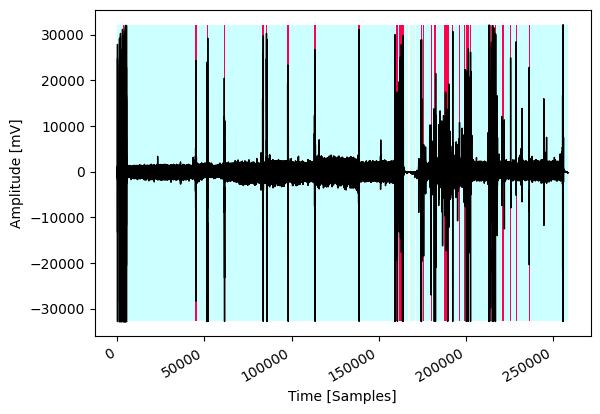

In [196]:
# Assuming the detect_patterns function is updated as shown above
start_point, end_point, window_shift, fs = 0, 500, 500, 50
data_stream, utc_time, event_flags = detect_patterns(start_point, end_point, window_shift, data_stream, utc_time, plot=1)

# Detect bad windows (Movement and No-movement)
bad_window_indices = np.where((event_flags == 2) | (event_flags == 3))[0]  # Movement or No-movement flags

# Assuming `beats` and `HR` are already created and aligned:
beats_trimmed = np.array(beats[:len(event_flags)])
HR = np.array(HR[:len(event_flags)])

# Remove the bad window indices from both beats_trimmed and HR
beats_trimmed = np.delete(beats_trimmed, bad_window_indices)
HR = np.delete(HR, bad_window_indices)

# **Ensure they are of the same length**
min_length = min(len(beats_trimmed), len(HR))
beats_trimmed = beats_trimmed[:min_length]
HR = HR[:min_length]

# Drop NaN values from both arrays
valid_indices = ~np.isnan(beats_trimmed) & ~np.isnan(HR) & (HR != 0)  # Exclude zero values from HR
beats_trimmed = beats_trimmed[valid_indices]
HR = HR[valid_indices]

# **Calculate MAE, RMSE, and MAPE**
mae = mean_absolute_error(HR, beats_trimmed)
rmse = np.sqrt(mean_squared_error(HR, beats_trimmed))
mape = np.mean(np.abs((HR - beats_trimmed) / HR)) * 100  # Fixed HR variable name

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [197]:
print('\nHeart Rate Information from BCG')
print('Minimum pulse : ', np.around(np.min(beats)))
print('Maximum pulse : ', np.around(np.max(beats)))
print('Average pulse : ', np.around(np.mean(beats)))

print('\nHeart Rate Information from RR')
print('Minimum pulse : ', np.around(np.min(HR)))
print('Maximum pulse : ', np.around(np.max(HR)))
print('Average pulse : ', np.around(np.mean(HR)))


Heart Rate Information from BCG
Minimum pulse :  63.0
Maximum pulse :  101.0
Average pulse :  80.0

Heart Rate Information from RR
Minimum pulse :  76.0
Maximum pulse :  105.0
Average pulse :  83.0


In [198]:
%matplotlib inline


**2. Bland-Altman Plot**

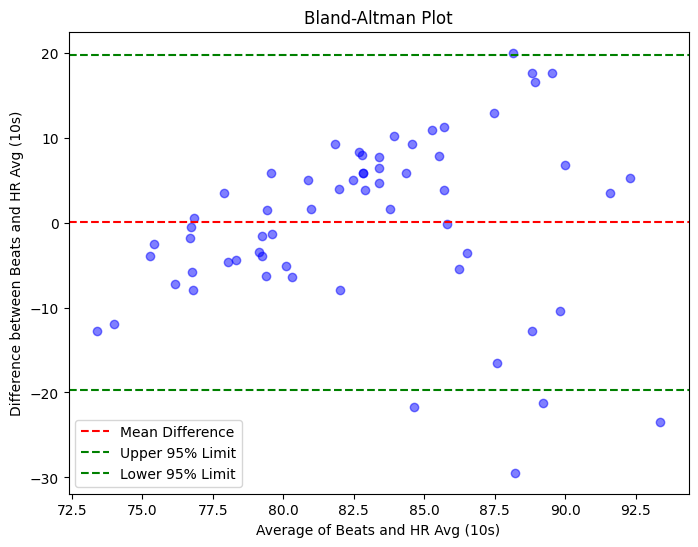

Mean Difference: 0.04212129321237489


In [199]:
import matplotlib.pyplot as plt

# 2. **Bland-Altman Plot**
differences = beats_trimmed - HR
averages = (beats_trimmed + HR) / 2

# Create the Bland-Altman plot
plt.figure(figsize=(8, 6))
plt.scatter(averages, differences, color='blue', alpha=0.5)
plt.axhline(np.mean(differences), color='red', linestyle='--', label='Mean Difference')
plt.axhline(np.mean(differences) + 1.96 * np.std(differences), color='green', linestyle='--', label='Upper 95% Limit')
plt.axhline(np.mean(differences) - 1.96 * np.std(differences), color='green', linestyle='--', label='Lower 95% Limit')
plt.title('Bland-Altman Plot')
plt.xlabel('Average of Beats and HR Avg (10s)')
plt.ylabel('Difference between Beats and HR Avg (10s)')
plt.legend()
plt.show()
print(f'Mean Difference: {np.mean(differences)}')




**3. Pearson Correlation Plot**

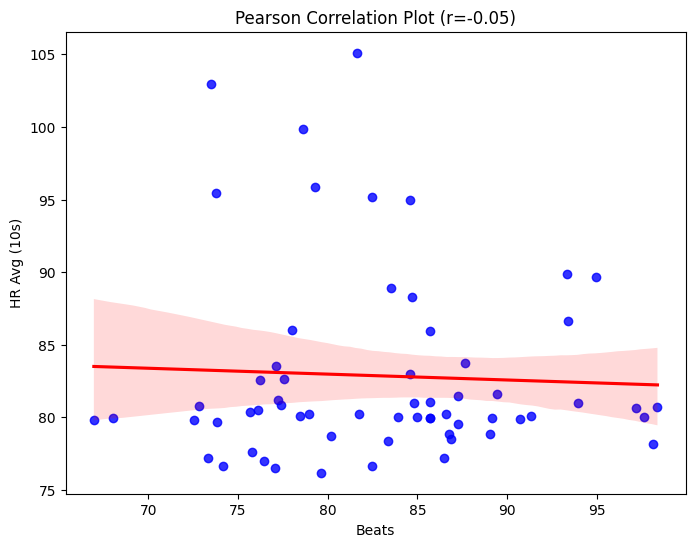

Pearson Correlation: -0.04633305502424406


In [200]:
from scipy import stats
import seaborn as sns


# 3. **Pearson Correlation Plot**
# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(beats_trimmed, HR)

# Create the scatter plot for Pearson correlation
plt.figure(figsize=(8, 6))
sns.regplot(x=beats_trimmed, y=HR, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Pearson Correlation Plot (r={pearson_corr:.2f})')
plt.xlabel('Beats')
plt.ylabel('HR Avg (10s)')
plt.show()


# Output Pearson correlation
print(f'Pearson Correlation: {pearson_corr}')

4. **Boxplot**

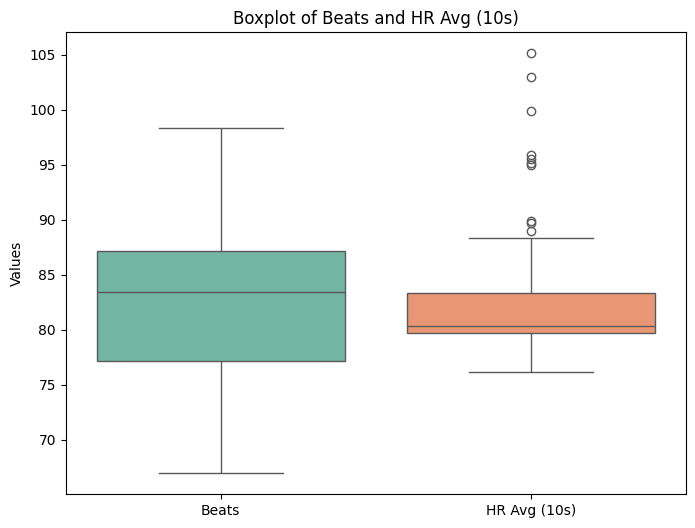

In [201]:
# 4. **Boxplot**
plt.figure(figsize=(8, 6))
sns.boxplot(data=[beats_trimmed, HR], palette="Set2")
plt.xticks([0, 1], ['Beats', 'HR Avg (10s)'])
plt.title('Boxplot of Beats and HR Avg (10s)')
plt.ylabel('Values')
plt.show()